In [1]:
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import scipy.stats

import glob

# Loading databases

In [2]:
# Take out the nan entries

def NanOff(df):
    new = pd.DataFrame(df)
    new = new.replace(np.nan,float('-1'))
    return new

In [3]:
# Number of entries array
Entries = np.array([])
EntriesCuts = np.array([])

DFrameArray = []
DFrameArrayCuts = []

FileNames = []

def OneDataFrame():
    
    for f in glob.glob('Databases/*.xls'):
        df = pd.read_excel(f,sheet_name='hoja1')
        df = NanOff(df) # TAKE OUT THE NAN ENTRIES
        
        DFrameArray.append(df)
        FileNames.append(f)
        
    dft = pd.concat(DFrameArray,ignore_index='True')
    
    return dft

In [4]:
# each element in DFrameArray is a dataframe for each section

# The index 4 contains all the information
DFrameArray.append(OneDataFrame())
DFrameArrayCuts = DFrameArray[:] #  Do slicing properly

print(id(DFrameArray))
print(id(DFrameArrayCuts))

140496263240664
140496263237856


In [5]:
Entries = np.array([])

for i in range(len(FileNames)+1):
    Entries = np.append(Entries, DFrameArray[i]['ID'].count())
    if i != 4:
        print(FileNames[i])
# Total entries in each group
print(Entries)

Databases/202110_10468_Lista de clase_16.xls
Databases/202110_39380_Lista de clase_17.xls
Databases/202110_39422_Lista de clase_19.xls
Databases/202110_39384_Lista de clase_18.xls
[23. 21. 20. 21. 85.]


In [6]:
DFrameArray[4].describe()

,ID,Nota1,A1,B1,C1,D1,E1,F1,Nota2,A2,...,D14,E14,F14,Nota15,A15,B15,C15,D15,E15,F15
count,8.500000e+01,85.000000,85.000000,85.000000,85.000000,85.0,85.0,85.0,85.000000,85.000000,...,85.0,85.0,85.0,85.000000,85.000000,85.000000,85.000000,85.0,85.0,85.0
mean,2.019522e+08,3.290588,0.672941,0.527059,0.272941,-1.0,-1.0,-1.0,3.335294,0.704706,...,-1.0,-1.0,-1.0,3.578824,0.611765,0.574118,0.547059,-1.0,-1.0,-1.0
std,1.343301e+05,1.107617,0.180863,0.218974,0.308371,0.0,0.0,0.0,1.258467,0.208113,...,0.0,0.0,0.0,2.023440,0.312597,0.310588,0.319817,0.0,0.0,0.0
min,2.014233e+08,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0,0.000000,0.000000,...,-1.0,-1.0,-1.0,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,-1.0
25%,2.019209e+08,2.500000,0.600000,0.500000,0.000000,-1.0,-1.0,-1.0,2.500000,0.700000,...,-1.0,-1.0,-1.0,1.600000,0.500000,0.400000,0.300000,-1.0,-1.0,-1.0
50%,2.020131e+08,3.500000,0.700000,0.500000,0.000000,-1.0,-1.0,-1.0,3.500000,0.700000,...,-1.0,-1.0,-1.0,5.000000,0.800000,0.800000,0.700000,-1.0,-1.0,-1.0
75%,2.020211e+08,4.000000,0.800000,0.600000,0.500000,-1.0,-1.0,-1.0,4.400000,0.800000,...,-1.0,-1.0,-1.0,5.000000,0.800000,0.800000,0.800000,-1.0,-1.0,-1.0
max,2.021134e+08,5.000000,1.000000,1.000000,1.000000,-1.0,-1.0,-1.0,5.000000,0.900000,...,-1.0,-1.0,-1.0,5.000000,0.800000,0.800000,0.800000,-1.0,-1.0,-1.0


# Descriptive Statistics

In [7]:
#Names = ['Nota','A','B','C','D','E','F']
Names = ['Nota']

NNotas = 3

DictMean = {}
DictStd = {}

for i in Names:  # Cathegories
    
    for j in range(1,NNotas+1): # Grades
        
        Name_ = i + str(j)
        
        print('Calculating for: '+Name_)

        Mean = np.array([])
        Std = np.array([])


        for k in range(len(FileNames)+1):
            Mean = np.append(Mean,np.average(DFrameArray[k][Name_]))
            Std = np.append(Std,np.std(DFrameArray[k][Name_]))
        
        DictMean[Name_] = Mean
        DictStd[Name_] = Std

Calculating for: Nota1
Calculating for: Nota2
Calculating for: Nota3


In [8]:
# Print Dictionaries

for i in DictMean.keys():
    print(i+':')
    print(DictMean[i])
    print(DictStd[i])

Nota1:
[2.67391304 3.5047619  3.365      3.68095238 3.29058824]
[1.14785902 1.00828765 1.23502024 0.6122706  1.1010822 ]
Nota3:
[4.15217391 3.97142857 3.74       4.35238095 4.06      ]
[1.26038971 1.46974013 1.46812806 0.64484701 1.27391938]
Nota2:
[3.26956522 3.54285714 2.855      3.65714286 3.33529412]
[1.03269794 1.18223816 1.48002534 1.14541381 1.25104247]


# Cuts

In [9]:
def GetCuts(Cuts_):
    
    EntriesCuts = np.array([])

    
    for i in range(len(FileNames)+1):
    
        # Set of cuts
        Cut0 = DFrameArray[i]['Nota1'] >= Cuts_['Nota1']
        Cut1 = DFrameArray[i]['A1'] >= Cuts_['A1']
        #Cut2 = DFrameArray[i][Keys[2]] >= Values[2]
        Cut2 = True
        #Cut3 = DFrameArray[i][Keys[3]] >= Values[3]
        Cut3 = True
    
        DFrameArrayCuts[i] = DFrameArray[i][(Cut0) & (Cut1)]    
        # Get the new number of entries
        EntriesCuts = np.append(EntriesCuts, DFrameArrayCuts[i]['ID'].count())


    # Array of efficiencies
    Efficiencies = EntriesCuts/Entries
    
    #Testing 
    #print(EntriesCuts, Entries)
        
    return Efficiencies, EntriesCuts

In [10]:
Cuts = {'Nota1':3.0, 'A1': 0.5, 'B1': 0., 'C1':0.}
Efficiencies, EntriesCuts = GetCuts(Cuts)
print(EntriesCuts)
print(Efficiencies)

# Closure Test
for i in range(len(FileNames)+1):
    print(DFrameArrayCuts[i]['ID'].count())

#print(Entries)

[ 9. 18. 15. 20. 62.]
[0.39130435 0.85714286 0.75       0.95238095 0.72941176]
9
18
15
20
62


In [11]:
#print(DFrameArrayCuts[4])

# Plotting

In [12]:
def CreateGroupFig(Input,Cuts,grupo,variable):
    
    Font1 = 8
    Font2 = 12
    
    if Cuts:
        print('-- Plotting with Cuts ---', variable)
    else:
        print('-- Plotting ---', variable)
    
    DFrame = Input[:]
    
    # Plots for each sample
    fig = plt.figure(figsize=(10,10))

    ax1 = fig.add_subplot(2,2,1)
    if len(DFrame[0].index) != 0:
        ax1 = DFrame[0].groupby(grupo)[variable].sum().plot(kind='bar', fontsize=Font1)
    #ax1.set_xlabel(grupo, fontsize=Font2)
    ax1.set_ylabel(variable, fontsize=Font2)

    ax2 = fig.add_subplot(2,2,2)
    if len(DFrame[1].index) != 0:
        ax2 = DFrame[1].groupby(grupo)[variable].sum().plot(kind='bar', fontsize=Font1)
    #ax2.set_xlabel(grupo, fontsize=Font2)
    #ax2.set_ylabel(variable, fontsize=Font2)

    ax3 = fig.add_subplot(2,2,3)
    if len(DFrame[2].index) != 0:
        ax3 = DFrame[2].groupby(grupo)[variable].sum().plot(kind='bar', fontsize=Font1)
    ax3.set_xlabel(grupo, fontsize=Font2)
    ax3.set_ylabel(variable, fontsize=Font2)

    ax4 = fig.add_subplot(2,2,4)
    if len(DFrame[3].index) != 0:
        ax4 = DFrame[3].groupby(grupo)[variable].sum().plot(kind='bar', fontsize=Font1)
    ax4.set_xlabel(grupo, fontsize=Font2)
    #ax4.set_ylabel(variable, fontsize=Font2)

    Name = 'Figures/Groups/' + grupo + '_' + variable + '.pdf'
    if Cuts:
        Name = 'Figures/Groups/' + grupo + '_' + variable + '_Cuts.pdf'
        
    plt.savefig(Name,dpi=100,bbox_inches='tight')
    plt.close()

    # Plot for the whole sample
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(1,1,1)
    if len(DFrame[4].index) != 0:
        ax1 = DFrame[4].groupby(grupo)[variable].sum().plot(kind='bar', fontsize=Font1)
    ax1.set_xlabel(grupo, fontsize=Font2)
    ax1.set_ylabel(variable, fontsize=Font2)
    
    NameT = 'Figures/Groups/' + grupo + '_' + variable + '_T.pdf'
    if Cuts:
        NameT = 'Figures/Groups/' + grupo + '_' + variable + '_T_Cuts.pdf'
    
    plt.savefig(NameT,dpi=100,bbox_inches='tight')
    plt.close()

In [13]:
# Plotting using group by

grupo = 'ID'  # Variable que agrupa

for i in Names:  # Cathegories
    
    for j in range(1,NNotas+1): # Grades
        
        Name_ = i + str(j)
        
        CreateGroupFig(DFrameArray, False, grupo, Name_)
        CreateGroupFig(DFrameArrayCuts, True, grupo, Name_)

('-- Plotting ---', 'Nota1')
('-- Plotting with Cuts ---', 'Nota1')
('-- Plotting ---', 'Nota2')
('-- Plotting with Cuts ---', 'Nota2')
('-- Plotting ---', 'Nota3')
('-- Plotting with Cuts ---', 'Nota3')


# Plotting Histos

In [14]:
length = len(DFrameArray[4].iloc[0,:]) # Number of the columns

ColNames = list(DFrameArray[4]) # Names of the columns

print(ColNames)

print(len(ColNames))

['Nombre', 'ID', 'Nota1', 'A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'Nota2', 'A2', 'B2', 'C2', 'D2', 'E2', 'F2', 'Nota3', 'A3', 'B3', 'C3', 'D3', 'E3', 'F3', 'Nota4', 'A4', 'B4', 'C4', 'D4', 'E4', 'F4', 'Nota5', 'A5', 'B5', 'C5', 'D5', 'E5', 'F5', 'Nota6', 'A6', 'B6', 'C6', 'D6', 'E6', 'F6', 'Nota7', 'A7', 'B7', 'C7', 'D7', 'E7', 'F7', 'Nota8', 'A8', 'B8', 'C8', 'D8', 'E8', 'F8', 'Nota9', 'A9', 'B9', 'C9', 'D9', 'E9', 'F9', 'Nota10', 'A10', 'B10', 'C10', 'D10', 'E10', 'F10', 'Nota11', 'A11', 'B11', 'C11', 'D11', 'E11', 'F11', 'Nota12', 'A12', 'B12', 'C12', 'D12', 'E12', 'F12', 'Nota13', 'A13', 'B13', 'C13', 'D13', 'E13', 'F13', 'Nota14', 'A14', 'B14', 'C14', 'D14', 'E14', 'F14', 'Nota15', 'A15', 'B15', 'C15', 'D15', 'E15', 'F15']
107


In [15]:
def CreateHistoFig(Input, Cuts, Column, Name, Bins = 15, density_ = False):
    
    if Cuts:
        print('-- Plotting with Cuts ---', Name)
    else:
        print('-- Plotting ---', Name)
    
    Ylabel = r'N$\'u$mero de estudiantes'
    DFrame = Input[:]
    Font1 = 12
    
    
    
    fig = plt.figure(figsize=(10,10))
    
    ax1 = fig.add_subplot(2,2,1)
    if len(DFrame[0].index) != 0:
        n, bins, patches = ax1.hist(DFrame[0].iloc[:,Column], edgecolor='black', bins = Bins, density = density_, facecolor='blue', alpha=0.70, label='FISI-16')
        (mu, sigma) = norm.fit(DFrame[0].iloc[:,Column])
        y = scipy.stats.norm.pdf( bins, mu, sigma)
        ax1.plot(bins, y, 'r--', linewidth=3)
    #ax1.set_xlabel(Name, fontsize=Font1)
    ax1.set_ylabel(Ylabel, fontsize=Font1)
    ax1.set_title(r'$\mu=%.3f,\ \sigma=%.3f,\ Total=%.0f$' %(mu, sigma, Entries[0]))
    if Cuts:
        ax1.set_title(r'$\mu=%.3f,\ \sigma=%.3f,\ Total=%.0f$' %(mu, sigma, Entries[0]))  
    ax1.legend(loc=0)
    
    ax2 = fig.add_subplot(2,2,2)
    if len(DFrame[1].index) != 0:
        n, bins, patches = ax2.hist(DFrame[1].iloc[:,Column], edgecolor='black', bins = Bins, density = density_, facecolor='blue', alpha=0.70, label='FISI-17')
        (mu, sigma) = norm.fit(DFrame[1].iloc[:,Column])
        y = scipy.stats.norm.pdf( bins, mu, sigma)
        ax2.plot(bins, y, 'r--', linewidth=3)
        
    #ax2.set_xlabel(Name, fontsize=Font1)
    #ax2.set_ylabel(Ylabel, fontsize=Font1)
    ax2.set_title(r'$\mu=%.3f,\ \sigma=%.3f,\ Total=%.0f$' %(mu, sigma, Entries[1]))
    if Cuts:
        ax2.set_title(r'$\mu=%.3f,\ \sigma=%.3f,\ Total=%.0f$' %(mu, sigma, Entries[1]))  
    ax2.legend(loc=0)
    
    ax3 = fig.add_subplot(2,2,3)
    if len(DFrame[2].index) != 0:
        n, bins, patches = ax3.hist(DFrame[2].iloc[:,Column], edgecolor='black', bins = Bins, density = density_, facecolor='blue', alpha=0.70, label='FISI-18')
        (mu, sigma) = norm.fit(DFrame[2].iloc[:,Column])
        y = scipy.stats.norm.pdf( bins, mu, sigma)
        ax3.plot(bins, y, 'r--', linewidth=3)
        
    ax3.set_xlabel(Name, fontsize=Font1)
    ax3.set_ylabel(Ylabel, fontsize=Font1)
    
    ax3.set_title(r'$\mu=%.3f,\ \sigma=%.3f,\ Total=%.0f$' %(mu, sigma, Entries[2]))
    if Cuts:
        ax3.set_title(r'$\mu=%.3f,\ \sigma=%.3f,\ Total=%.0f$' %(mu, sigma, Entries[2]))  

    ax3.legend(loc=0)
    
    ax4 = fig.add_subplot(2,2,4)
    if len(DFrame[3].index) != 0:
        n, bins, patches = ax4.hist(DFrame[3].iloc[:,Column], edgecolor='black', bins = Bins, density = density_, facecolor='blue', alpha=0.70, label='FISI-19')
        (mu, sigma) = norm.fit(DFrame[3].iloc[:,Column])
        y = scipy.stats.norm.pdf( bins, mu, sigma)
        ax4.plot(bins, y, 'r--', linewidth=3)
        
    ax4.set_xlabel(Name, fontsize=Font1)
    #ax4.set_ylabel(Ylabel, fontsize=Font1)
    
    ax4.set_title(r'$\mu=%.3f,\ \sigma=%.3f,\ Total=%.0f$' %(mu, sigma, Entries[3]), fontsize=Font1)
    if Cuts:
        ax4.set_title(r'$\mu=%.3f,\ \sigma=%.3f,\ Total=%.0f$' %(mu, sigma, Entries[3]), fontsize=Font1)  
    
    ax4.legend(loc=0)
    
    NameF = 'Figures/Histos/Histo_' + Name + '.pdf'
    if Cuts:
        NameF = 'Figures/Histos/Histo_' + Name + '_Cuts.pdf'
    
   
    plt.savefig(NameF, dpi=120,bbox_inches='tight')
    plt.close()
    
    # Plot for the whole sample
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(1,1,1)
    if len(DFrame[4].index) != 0:
        n, bins, patches = ax1.hist(DFrame[4].iloc[:,Column], edgecolor='black', bins = Bins, density = density_, facecolor='blue', alpha=0.70, label='FISICA-I')
        (mu, sigma) = norm.fit(DFrame[4].iloc[:,Column])
        y = scipy.stats.norm.pdf( bins, mu, sigma)
        ax1.plot(bins, y, 'r--', linewidth=3)
        
    ax1.set_xlabel(Name, fontsize=Font1)
    ax1.set_ylabel(Ylabel, fontsize=Font1)
   # ax1.set_xlim(0.,5.)
    ax1.set_title(r'$\mu=%.3f,\ \sigma=%.3f,\ Total=%.0f$' %(mu, sigma, Entries[4]), fontsize=Font1)
    if Cuts:
        ax1.set_title(r'$\mu=%.3f,\ \sigma=%.3f,\ Total=%.0f$' %(mu, sigma, EntriesCuts[4]), fontsize=Font1) 
    ax1.legend(loc=0)
    
    NameFT = 'Figures/Histos/Histo_' + Name + '_T.pdf'
    if Cuts:
        NameFT = 'Figures/Histos/Histo_' + Name + '_T_Cuts.pdf'
    
    plt.savefig(NameFT, dpi=120,bbox_inches='tight')
    plt.close()

In [16]:
#For each column, a histogram is created...

for i in range(length-14,length):
    CreateHistoFig(DFrameArray, False, i, ColNames[i], density_ = False)
    CreateHistoFig(DFrameArrayCuts, True, i, ColNames[i], density_ = False)

('-- Plotting ---', 'Nota14')
('-- Plotting with Cuts ---', 'Nota14')
('-- Plotting ---', 'A14')
('-- Plotting with Cuts ---', 'A14')
('-- Plotting ---', 'B14')
('-- Plotting with Cuts ---', 'B14')
('-- Plotting ---', 'C14')
('-- Plotting with Cuts ---', 'C14')
('-- Plotting ---', 'D14')


/home/alejandro/anaconda2/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1662: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


('-- Plotting with Cuts ---', 'D14')
('-- Plotting ---', 'E14')
('-- Plotting with Cuts ---', 'E14')
('-- Plotting ---', 'F14')
('-- Plotting with Cuts ---', 'F14')
('-- Plotting ---', 'Nota15')
('-- Plotting with Cuts ---', 'Nota15')
('-- Plotting ---', 'A15')
('-- Plotting with Cuts ---', 'A15')
('-- Plotting ---', 'B15')
('-- Plotting with Cuts ---', 'B15')
('-- Plotting ---', 'C15')
('-- Plotting with Cuts ---', 'C15')
('-- Plotting ---', 'D15')
('-- Plotting with Cuts ---', 'D15')
('-- Plotting ---', 'E15')
('-- Plotting with Cuts ---', 'E15')
('-- Plotting ---', 'F15')
('-- Plotting with Cuts ---', 'F15')


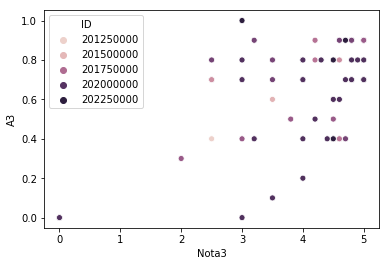

In [17]:
from seaborn import countplot
from seaborn import scatterplot
scatterplot(x='Nota3', y='A3',hue='ID', data=DFrameArray[4])
#countplot(x='A1',hue='ID', data=DFrameArray[0])

In [18]:
array1= ['ID','A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12']
array2= ['ID','Nota1','Nota2','Nota3','Nota4','Nota5','Nota6','Nota7','Nota8','Nota9','Nota10','Nota11','Nota12']


NewFrameA = DFrameArray[4].filter(items=array1)
NewFrameB = DFrameArray[4].filter(items=array1)
NewFrameC = DFrameArray[4].filter(items=array1)
NewFrameD = DFrameArray[4].filter(items=array1)
NewFrameE = DFrameArray[4].filter(items=array1)
NewFrameF = DFrameArray[4].filter(items=array1)
NewFrameN = DFrameArray[4].filter(items=array2)


length = len(NewFrameA.iloc[0,:])
students = len(NewFrameA.iloc[:,0])

print(students)

for i in range(students):
    
    print('--- creating for: ', NewFrameA.iloc[i,0])
    
    #if i != 0:
    #    continue
        
    
    
    fig = plt.figure(figsize=(14,10))
    fig.suptitle(str(NewFrameA.iloc[i,0]), fontsize=15)
    
    ax1 = fig.add_subplot(3,3,1) 
    ax2 = fig.add_subplot(3,3,2) 
    ax3 = fig.add_subplot(3,3,3)
    ax4 = fig.add_subplot(3,3,4)
    ax5 = fig.add_subplot(3,3,5)
    ax6 = fig.add_subplot(3,3,6)
    
    ax7 = fig.add_subplot(3,1,3)
        
    NumNota = []
    A = [] 
    B = [] 
    C = [] 
    D = []
    E = []
    F = []
    N = []

    for j in range(1,length):
        NumNota.append(j)
        A.append(NewFrameA.iloc[i,j])
        B.append(NewFrameB.iloc[i,j])
        C.append(NewFrameC.iloc[i,j])
        D.append(NewFrameD.iloc[i,j])
        E.append(NewFrameE.iloc[i,j])
        F.append(NewFrameF.iloc[i,j])
        N.append(NewFrameN.iloc[i,j])

    
    ax1.plot(NumNota,A,'ko',markersize=12,label=NewFrameA.iloc[i,0])
    ax2.plot(NumNota,B,'bo',markersize=12,label=NewFrameA.iloc[i,0])
    ax3.plot(NumNota,C,'ro',markersize=12,label=NewFrameA.iloc[i,0])
    ax4.plot(NumNota,D,'go',markersize=12,label=NewFrameA.iloc[i,0])
    ax5.plot(NumNota,E,'yo',markersize=12,label=NewFrameA.iloc[i,0])
    ax6.plot(NumNota,F,'bo',markersize=12,label=NewFrameA.iloc[i,0])
    
    ax7.plot(NumNota,N,'ko',markersize=12,label=NewFrameA.iloc[i,0])
    
    ax1.set_ylabel(r'$A$',fontsize=15)
    ax2.set_ylabel(r'$B$',fontsize=15)
    ax3.set_ylabel(r'$C$',fontsize=15)
    ax4.set_ylabel(r'$D$',fontsize=15)
    ax5.set_ylabel(r'$E$',fontsize=15)
    ax6.set_ylabel(r'$F$',fontsize=15)
    
    ax7.set_ylabel(r'$Nota$',fontsize=15)
    ax7.set_xlabel(r'N$\'u$mero de Semana', fontsize=15)
    
    ax1.set_ylim(-0.1,1.1)
    ax2.set_ylim(-0.1,1.1)
    ax3.set_ylim(-0.1,1.1)
    ax4.set_ylim(-0.1,1.1)
    ax5.set_ylim(-0.1,1.1)
    ax6.set_ylim(-0.1,1.1)
    
    ax7.set_ylim(-0.1,5.1)
    
   # ax1.legend(loc=1)
   # ax2.legend(loc=1)
   ## ax3.legend(loc=1)
    #ax4.legend(loc=1)
   # ax5.legend(loc=1)
    
    file_ = 'Figures/Students/'+ str(NewFrameA.iloc[i,0]) +'.png'
    
    plt.savefig(file_)
    plt.close()

85
('--- creating for: ', 202021047)
('--- creating for: ', 201632930)
('--- creating for: ', 202021204)
('--- creating for: ', 202014446)
('--- creating for: ', 202111884)
('--- creating for: ', 202025042)
('--- creating for: ', 201820035)
('--- creating for: ', 202113026)
('--- creating for: ', 202113279)
('--- creating for: ', 202113340)
('--- creating for: ', 202113407)
('--- creating for: ', 201423256)
('--- creating for: ', 202011965)
('--- creating for: ', 202012077)
('--- creating for: ', 202012135)
('--- creating for: ', 201819933)
('--- creating for: ', 202012365)
('--- creating for: ', 202021525)
('--- creating for: ', 201818133)
('--- creating for: ', 201730224)
('--- creating for: ', 202014758)
('--- creating for: ', 201923361)
('--- creating for: ', 201715398)
('--- creating for: ', 202014068)
('--- creating for: ', 201923442)
('--- creating for: ', 202020366)
('--- creating for: ', 201915016)
('--- creating for: ', 201816067)
('--- creating for: ', 202020920)
('--- creat

In [19]:
!convert Figures/Students/*.png -loop 0 -delay 20000 Students.gif

In [20]:
print(DFrameArray[1].iloc[0,:])

Nombre    AGUILAR ARDILA, SARA MARCELA
ID                           202014068
Nota1                                4
A1                                 0.7
B1                                 0.5
C1                                 0.6
D1                                  -1
E1                                  -1
F1                                  -1
Nota2                                3
A2                                 0.8
B2                                 0.6
C2                                 0.8
D2                                   0
E2                                  -1
F2                                  -1
Nota3                                5
A3                                 0.9
B3                                 0.8
C3                                 0.8
D3                                 0.9
E3                                  -1
F3                                  -1
Nota4                              3.5
A4                                 0.8
B4                       

In [21]:
DFrameArray[0].filter(items=['ID','A1','A2','A3','A4'],axis=1)

,ID,A1,A2,A3,A4
0,202021047,0.9,0.7,0.8,0.8
1,201632930,0.8,0.7,0.9,0.0
2,202021204,0.6,0.9,0.9,0.4
3,202014446,0.6,0.6,0.8,0.8
4,202111884,0.6,0.7,0.9,0.9
5,202025042,0.7,0.8,0.0,0.0
6,201820035,0.6,0.8,0.3,0.6
7,202113026,0.5,0.8,1.0,0.8
8,202113279,0.3,0.7,0.9,0.7
9,202113340,0.6,0.7,0.7,0.8


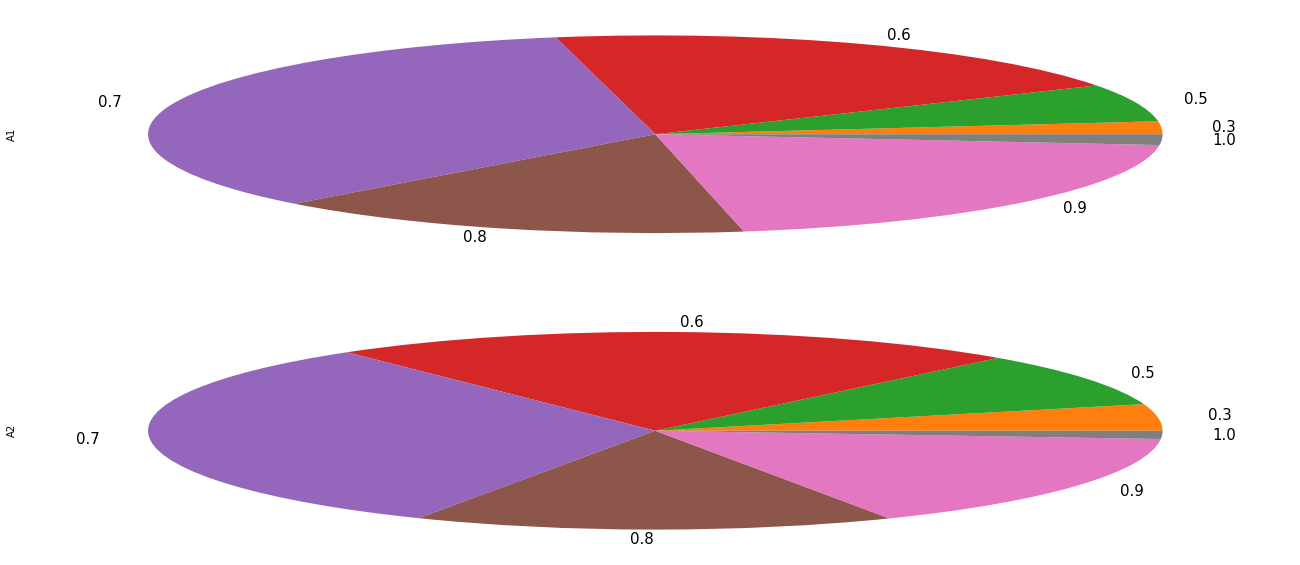

In [22]:
fig = plt.figure(figsize=(50,10))

ax1 = fig.add_subplot(2,2,1)
ax1 = DFrameArray[4].groupby('A1')['A1'].sum().plot(kind='pie', fontsize=15)
ax2 = fig.add_subplot(2,2,3)
ax2 = DFrameArray[4].groupby('A1')['A2'].sum().plot(kind='pie', fontsize=15)

plt.show()

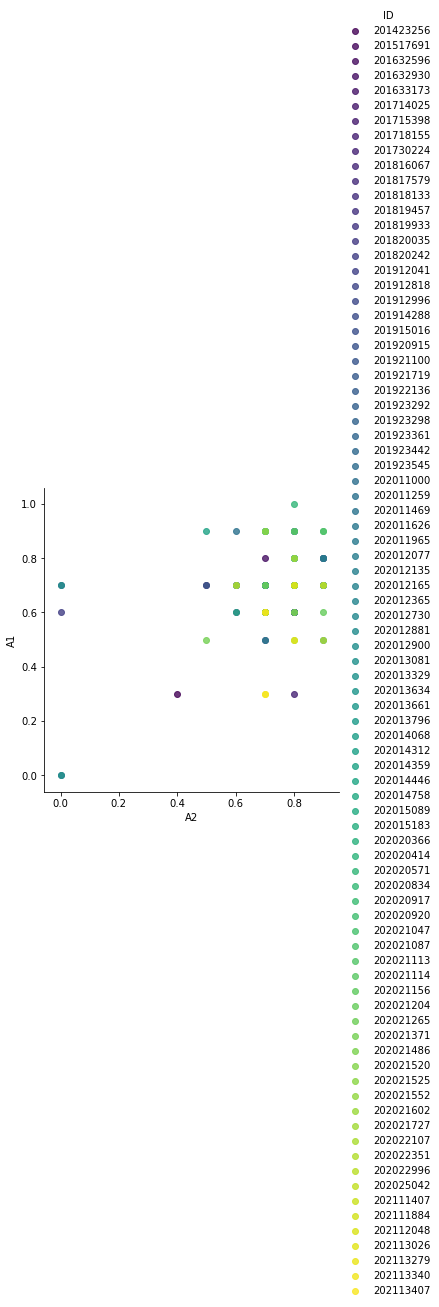

In [23]:
#fig = plt.figure()
sns.lmplot(x='A2',y='A1',data=DFrameArray[4],fit_reg=False,hue='ID',legend=True,palette='viridis')
#plt.savefig('Figures/A1seaborn.pdf',dpi=100,bbox_inches='tight')

In [24]:
# Uso de filtros por columna
#DFrameArray[0].filter(items=['ID','A1','A2'])
#DFrameArray[1].filter(like='A',axis=1)


# Seleccion por filar
#DFrameArray[2].set_index('A1')

#print(DFrameArray[2].loc[0:3])
#print(DFrameArray[2].iloc[:,0:2])

#print(DFrameArray[0]['Nota1'])
#print(dft['A1'])

In [25]:
# Agregar columna

Sum = 0

for i in range(1,2):
    Sum += DFrameArray[0]['A'+str(i)]

dtest = DFrameArray[0].assign(NotaFinal=Sum.values)
print(dtest)

                                Nombre         ID  Nota1   A1   B1   C1   D1  \
0                ESCOBAR TAMAYO, SOFIA  202021047    4.5  0.9  0.9  0.9 -1.0   
1       GALVIS CORREA, ANDRES FERNANDO  201632930    4.0  0.8  0.7  0.5 -1.0   
2             GOMEZ TOSCANO, ANA MARIA  202021204    2.0  0.6  0.2  0.0 -1.0   
3          IBARRA MUÑOZ, DAVID OCTAVIO  202014446    3.0  0.6  0.7  0.3 -1.0   
4     LEYTON LOPEZ, FERNANDA VALENTINA  202111884    2.5  0.6  0.6  0.4 -1.0   
5          LOPEZ MENDOZA, PEDRO ARTURO  202025042    3.5  0.7  0.6  0.5 -1.0   
6        MORENO SUAREZ, DORIS NATHALIA  201820035    1.5  0.6  0.0  0.0 -1.0   
7         SANCHEZ PAZOS, CAMILO ANDRES  202113026    2.5  0.5  0.3  0.5 -1.0   
8         VANEGAS ESCOBAR, JUAN FELIPE  202113279    2.0  0.3  0.5  0.5 -1.0   
9              VERA ANAYA, MARIA PAULA  202113340    2.0  0.6  0.3  0.0 -1.0   
10        ZAMORA CORTES, DAVID ERNESTO  202113407    1.5  0.3  0.3  0.0 -1.0   
11          CARDENAS BARRAGAN, NATALIA  

In [26]:
# Mirar posicion
print(dtest.iat[0,1])
# Cambiar posicion
##dtest.iat[0,1] = 3.
#print(dtest)


# Agregar columna o fila 
#dtest.loc['Suma x columna'] = dtest.sum(axis=0)
#dtest.loc[:,'Suma x Renglon'] = dtest.sum(axis=1)
#print(dtest)

202021047


0.6    7
0.8    4
0.3    4
0.5    4
0.7    2
0.9    2
Name: A1, dtype: int64


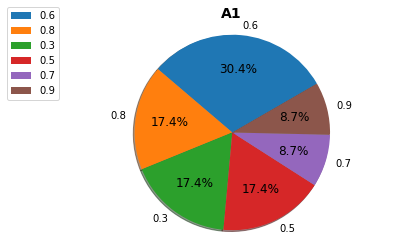

In [27]:
# Plotting pies


sizes = DFrameArray[0]['A1'].value_counts()
print(sizes)
pie = DFrameArray[0]['A1'].value_counts().plot(kind='pie', shadow=True,\
                                              autopct='%1.1f%%', startangle=30,\
                                              radius=1.5,center=(0.5,0.5),\
                                              textprops={'fontsize':12},frame=False,\
                                              pctdistance=0.65)
pie.set_ylabel('')
pie.set_xlabel('')


labels=sizes.index.unique()
plt.gca().axis('equal')
plt.title(DFrameArray[0].columns[3], weight='bold',size=14)
plt.legend(labels, bbox_to_anchor=(0.,1.1))


plt.savefig('Figures/A1.pdf',dpi=100,bbox_inches='tight')


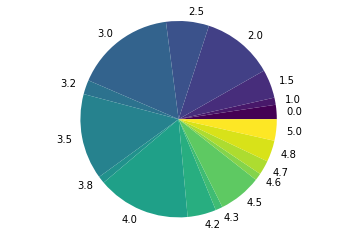

In [28]:
fig = plt.figure()

DFrameArray[4].ID.groupby(DFrameArray[4].Nota1).sum().plot(kind='pie',cmap='viridis')
plt.axis('equal')
plt.ylabel('')
plt.savefig('Figures/A1Pie.pdf',dpi=100,bbox_inches='tight')

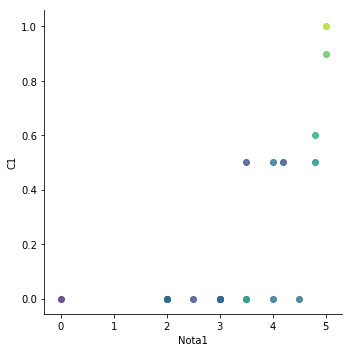

In [29]:
#fig = plt.figure()
sns.lmplot(x='Nota1',y='C1',data=DFrameArray[2],fit_reg=False,hue='B1',legend=False,palette='viridis')
#plt.savefig('Figures/A1seaborn.pdf',dpi=100,bbox_inches='tight')

In [30]:
#sns.set(style='ticks', color_codes=True)
#g = sns.pairplot(DFrameArray[2], hue='ID', palette='Spectral')

In [31]:
# Write the whole dataframe in an excel file


output = pd.ExcelWriter('DataBaseFisicaI.xls')
DFrameArrayCuts[4].to_excel(output,'Hoja1')
output.save()